## ETF price-volume relationship  

To compare different 
Industry: DIA/XLI  
Medical & Health: IHE/IBB/XLV  
Technology: QQQ/SMH  
Energy: XLE  
Financial: XLF  
Market: SPY  

In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [100]:
df1 = pd.read_csv('industry_etf.csv')
df1.rename(columns={'Attributes':'Date'}, inplace=True)
df1 = df1.drop(index=1)
df1.set_index('Date', inplace=True)
df1.head()

,open,open.1,open.2,open.3,open.4,open.5,open.6,open.7,open.8,open.9,...,volume.13,volume.14,volume.15,volume.16,volume.17,volume.18,volume.19,volume.20,volume.21,volume.22
Date,,,,,,,,,,,,,,,,,,,,,
Symbols,DIA,IBB,IHE,ITA,ITB,IWM,IYC,IYR,IYT,IYZ,...,SPY,XHB,XLB,XLE,XLF,XLI,XLP,XLU,XLV,XLY
2015-05-01,163.1623,112.1416,159.572,116.0162,25.4884,114.6117,137.3856,64.0702,146.8248,27.9606,...,103399711,6020645,6749902,11354599,18331079,11017898,5158317,12507400,11508332,6110220
2015-05-04,164.1911,114.1163,161.801,116.2851,25.9207,115.1871,139.4599,64.7752,149.2922,27.9878,...,70927235,3616168,4150209,14434247,22232282,6096265,6710241,13323122,8561748,3920894
2015-05-05,164.0909,113.9607,162.4527,116.4195,25.7635,115.3946,139.1238,64.4694,148.9861,27.8426,...,113326156,4608939,3761331,16076343,30639814,10026905,6537353,18621205,11373760,7856800
2015-05-06,163.7631,113.1596,160.9226,115.5745,25.6161,114.2251,137.7025,63.2378,147.4656,27.5251,...,135060151,3936545,5015558,16388582,29753265,8247719,6233272,16976140,10152164,8298192


In [101]:
#set plot type
plt.rcParams['figure.figsize'] = (18, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus

In [104]:
sel_etf = [0,18,2,1,21,10,12,16,17,13] #selected ETF(Industry, Medical & Health, Tech, Energy, Financial, Market)
def plot(t): #2 types
    for i in sel_etf:
        fig=plt.figure()
        if i == 0:
            i = ''
        else:
            i = '.'+str(i)
        plt.title(df1['close'+i][0])
        
        if t == 'n':
            close = df1['close'+i][2:].astype(float)
            volume = df1['volume'+i][2:].astype(float)
            color = 'darkorange'
            print(df1['close'+i][0]+'  '+str(close.corr(volume)))
            
        if t == 'pct':
            close = df1['close'+i][2:].astype(float).pct_change()
            volume = df1['volume'+i][2:].astype(float).pct_change()
            color = 'orangered'
            range_c = close.max() - close.min()
            range_v = volume.max() - volume.min()
            print(df1['close'+i][0]+'  '+str(close.corr(volume))+'  close_range  '+str(range_c)+'  volume_range  '+str(range_v))
            
        close.plot(label='close')    
        volume.plot(label='volume', secondary_y=True, color=color)
        
        handles,labels = [],[]
        for ax in fig.axes:
            for h,l in zip(*ax.get_legend_handles_labels()):
                handles.append(h)
                labels.append(l)

        plt.legend(handles,labels,loc=9)

DIA  -0.17687811569145032
XLI  -0.022346618883252335
IHE  -0.10397769492802185
IBB  -0.2466634460753513
XLV  -0.19788580590762112
QQQ  0.19878598356518964
SMH  0.3686086341047947
XLE  -0.4853729587415249
XLF  0.15300748514760196
SPY  -0.33235969944550775


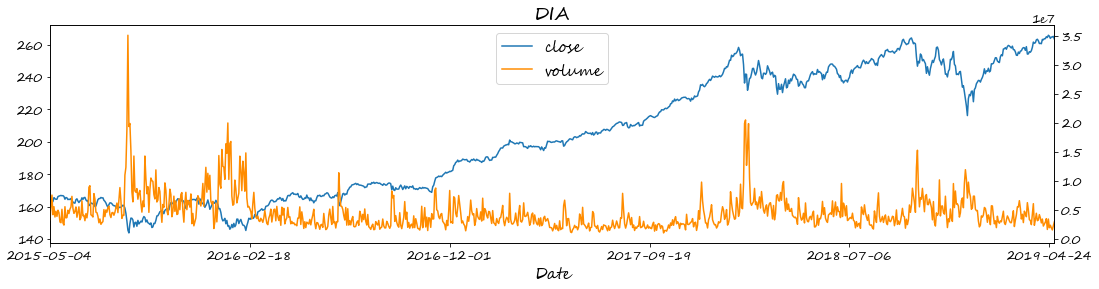

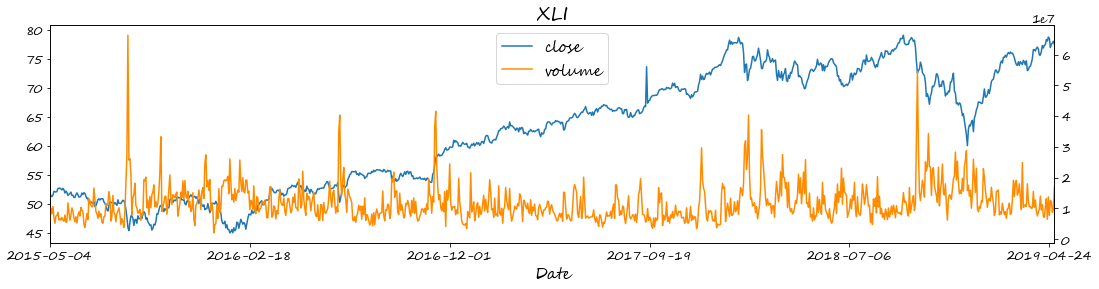

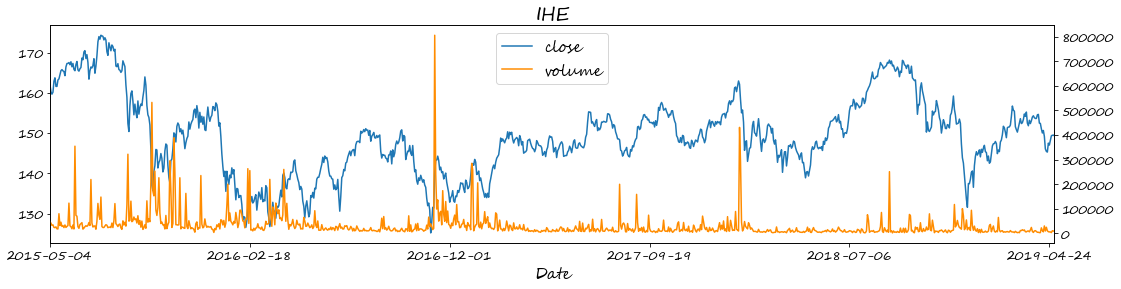

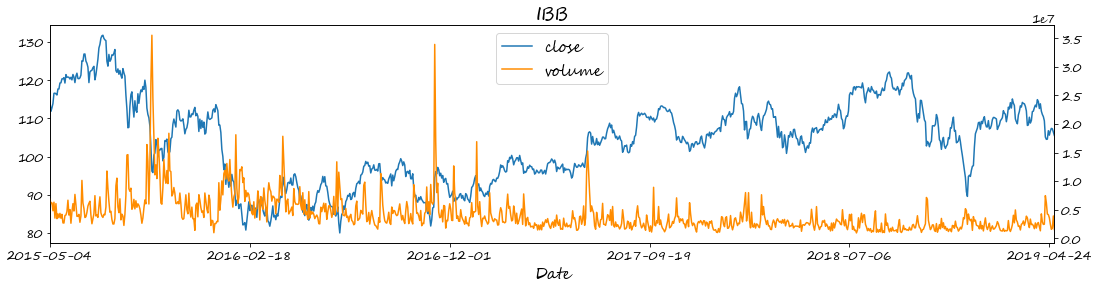

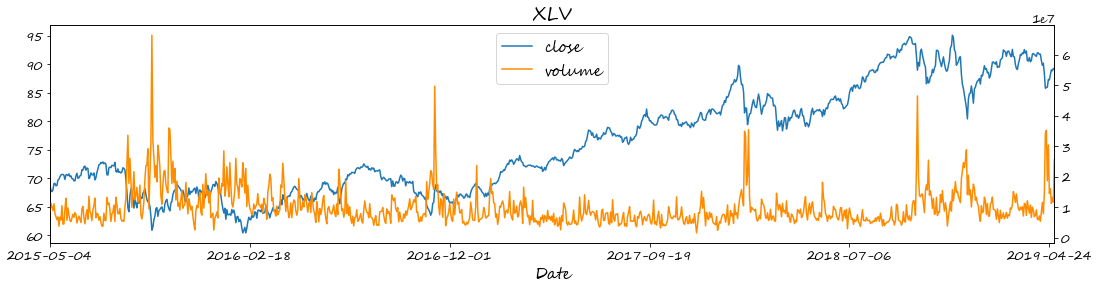

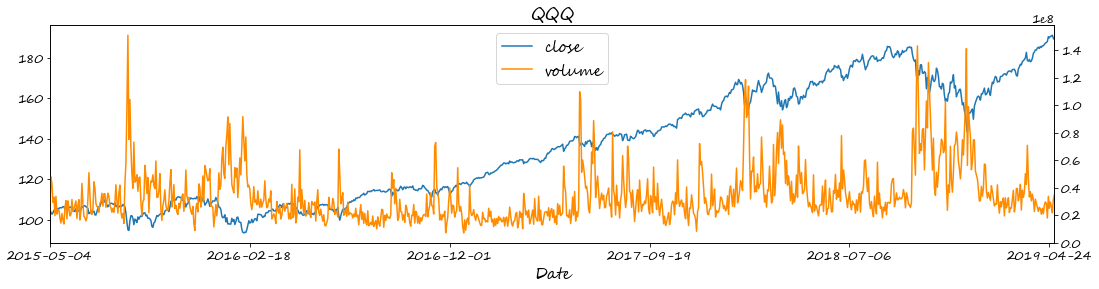

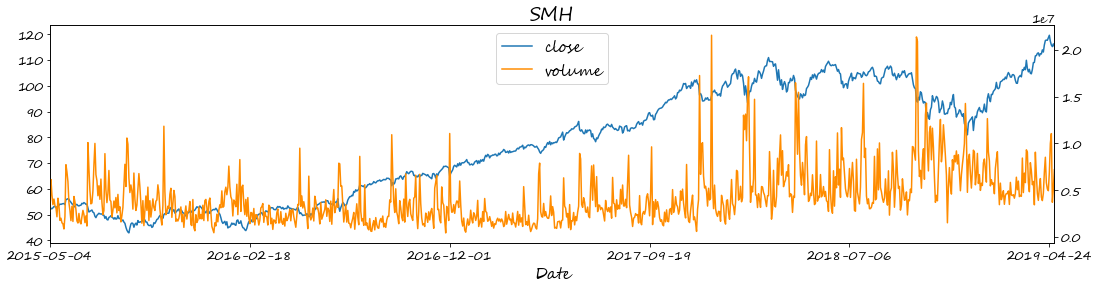

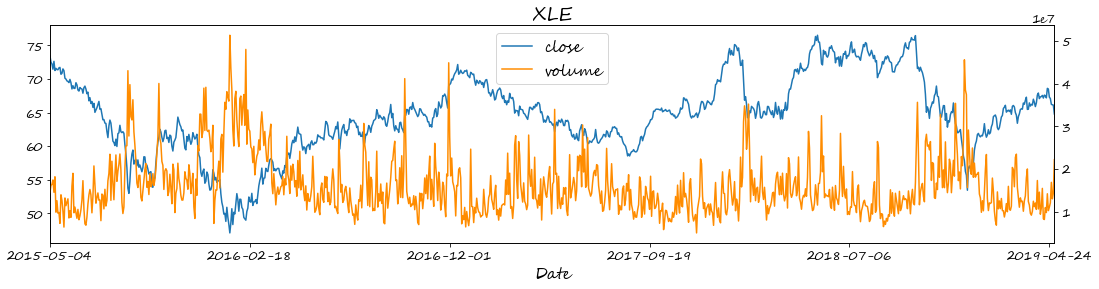

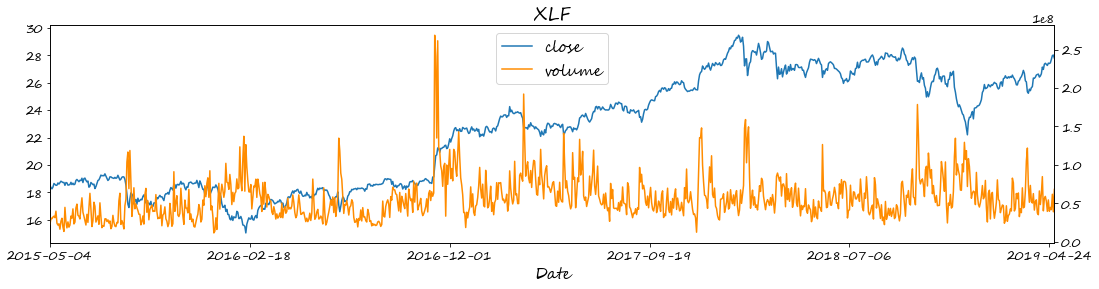

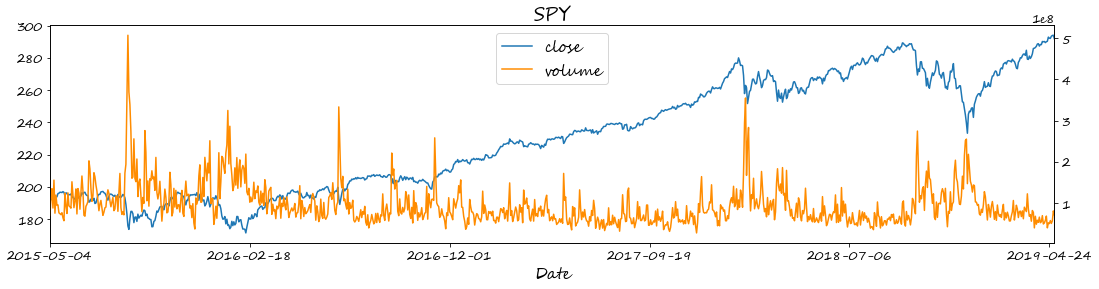

In [105]:
plot('n')

DIA  -0.1856841448186753  close_range  0.094385261030965  volume_range  3.5847033875406904
XLI  -0.1973452885827728  close_range  0.18848182367191124  volume_range  3.7413437338152167
IHE  0.05793141534445768  close_range  0.13040734612015004  volume_range  55.9981866787365
IBB  -0.13718514227677214  close_range  0.15260123118039992  volume_range  5.090453980013981
XLV  -0.18442156813085767  close_range  0.08792681983843409  volume_range  3.2282765048993207
QQQ  -0.2627964396989462  close_range  0.10820553408119615  volume_range  4.021965179817496
SMH  -0.16117094493956785  close_range  0.1260037818749732  volume_range  8.434689015123578
XLE  -0.04188321519117428  close_range  0.11592294833851713  volume_range  2.5792069233820683
XLF  -0.11185496683702459  close_range  0.09885093542050427  volume_range  3.9244278326813893
SPY  -0.28191859784239226  close_range  0.09234746628719304  volume_range  2.9658530202639115


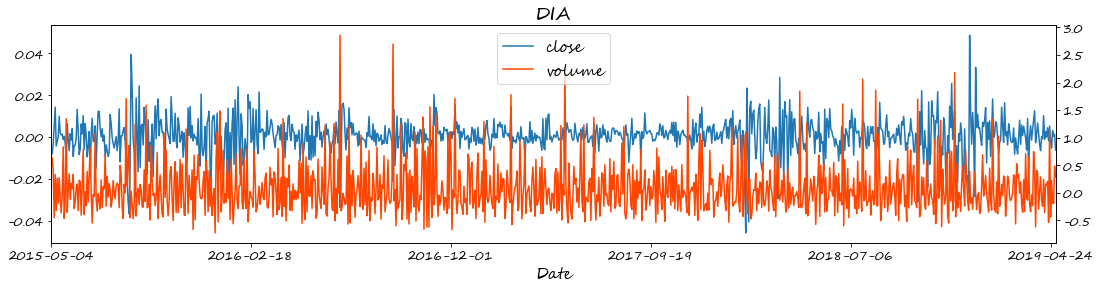

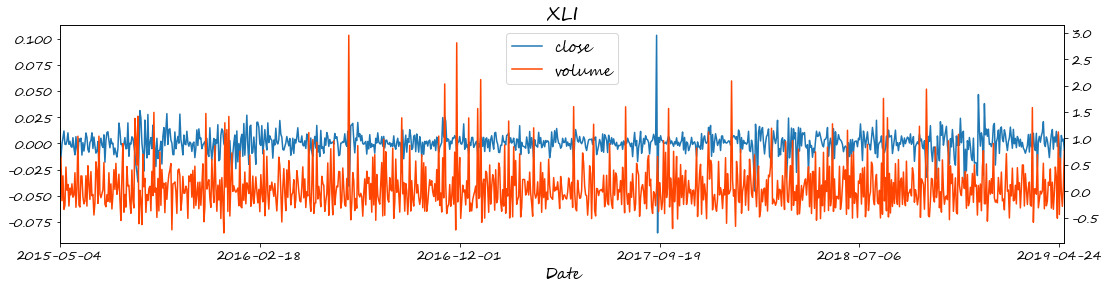

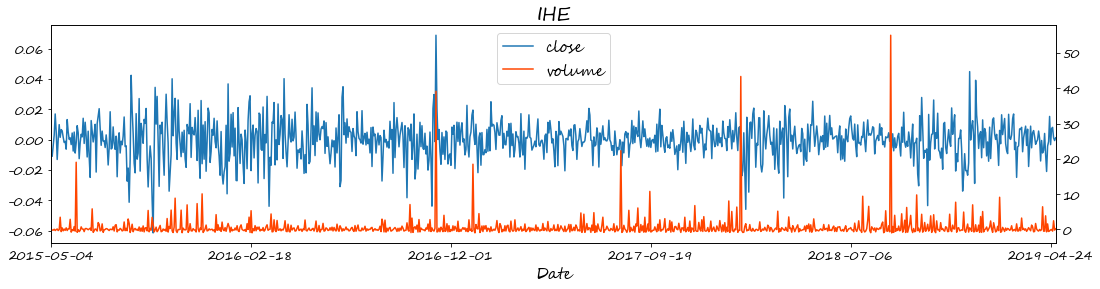

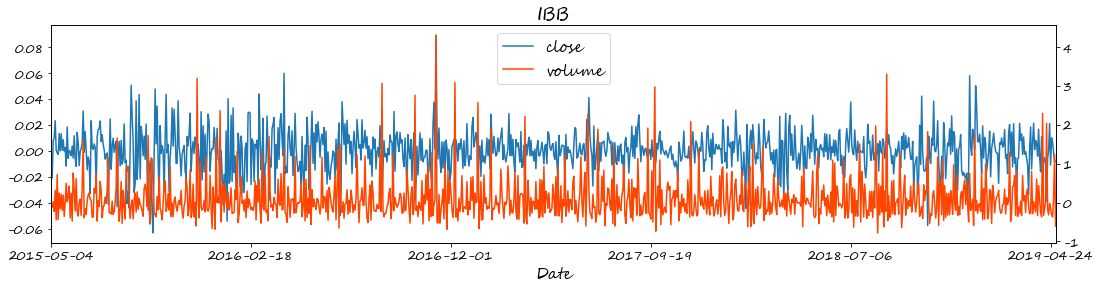

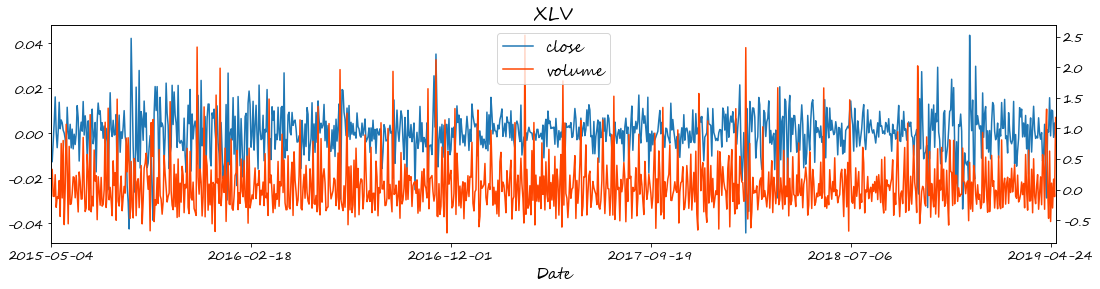

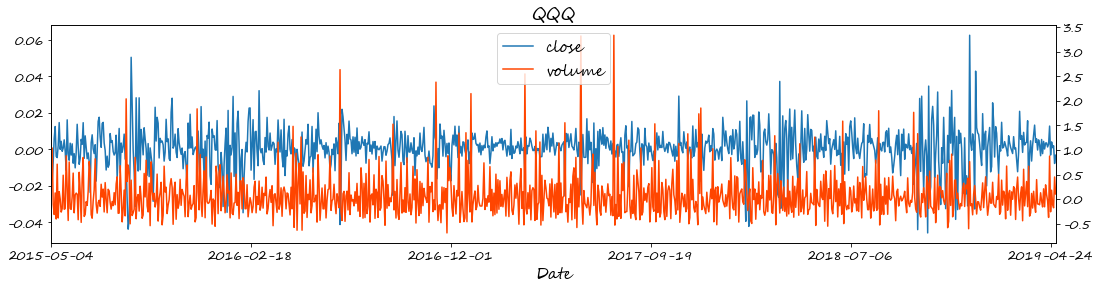

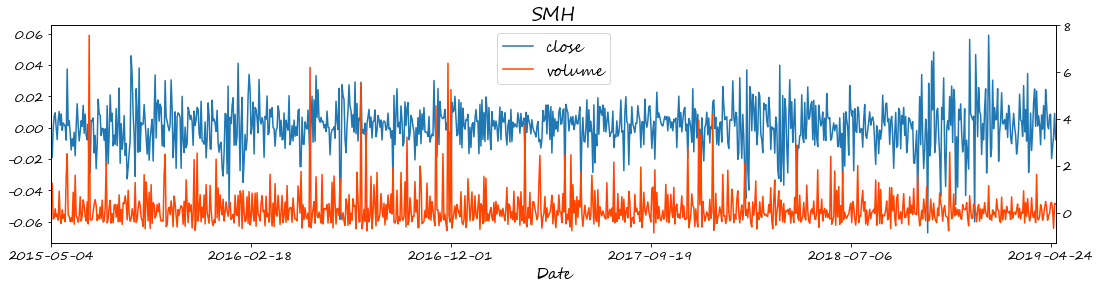

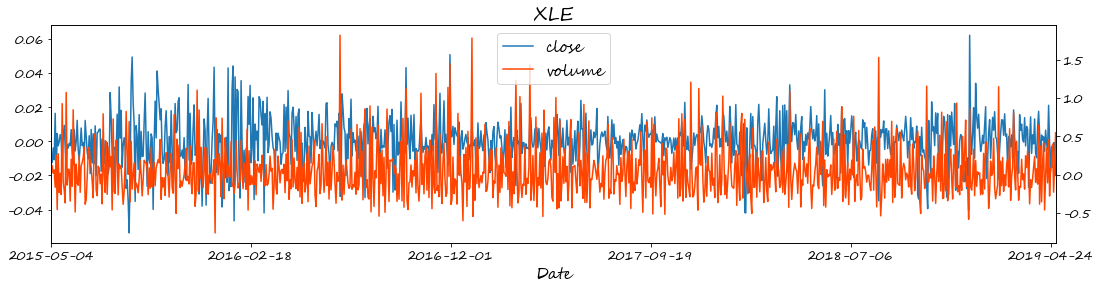

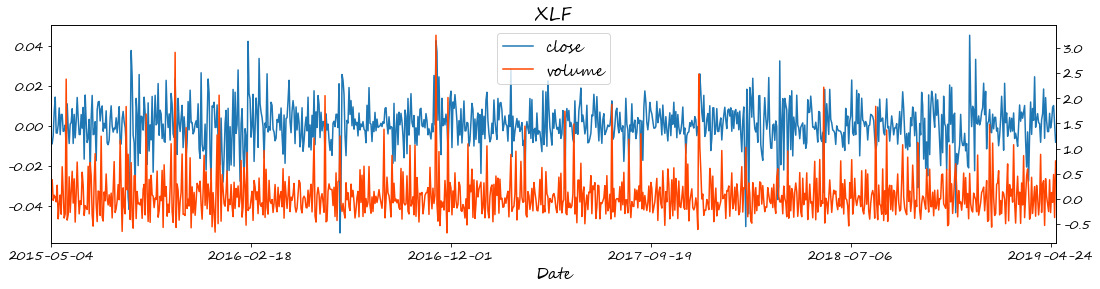

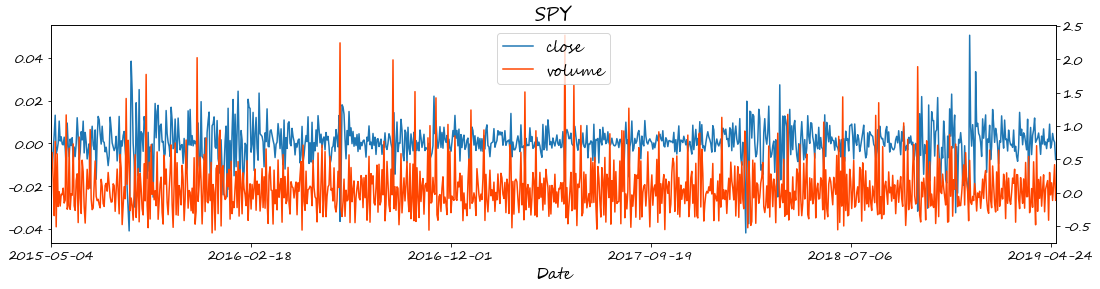

In [106]:
plot('pct')

2015/6/1 IHE 交易量暴漲  

[163.7905 164.2821 162.9802 ... 264.7806 265.1298 263.4939] [3895734. 3256866. 5316273. ... 1522458. 2259245. 2902461.]
[3.89573400e+06 7.15260000e+06 1.83632700e+06 ... 1.27762929e+08
 1.30022174e+08 1.27119713e+08]
                0
0       3895734.0
1       7152600.0
2       1836327.0
3      -5697853.0
4      -1555066.0
5       3974520.0
6        220959.0
7      -4521837.0
8       -670454.0
9       4250976.0
10      8773127.0
11     11663630.0
12     14430217.0
13      9349441.0
14     12073672.0
15      9716647.0
16      4186953.0
17      7775105.0
18      4114254.0
19      -809396.0
20      3539620.0
21     -1566618.0
22      3915326.0
23     -3397128.0
24     -8625863.0
25    -13006404.0
26    -17728827.0
27    -12247969.0
28     -8533167.0
29    -13099917.0
...           ...
977   102241958.0
978   106041968.0
979    99815479.0
980   104797933.0
981   108076651.0
982   104910497.0
983   107344876.0
984   111600735.0
985   117652446.0
986   115332398.0
987   118597926.0
988   122

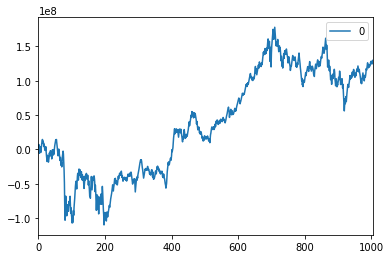

In [7]:
import talib as ta
import numpy as np
close = np.array(df1['close'][2:],dtype='float')
volume = np.array(df1['volume'][2:],dtype='float')
print(close,volume)
OBV = ta.OBV(close, volume)
print(OBV)
OBV = pd.DataFrame(OBV)
print(OBV)
OBV.plot()

#### Price Volume Trend(PVT) indicator  
* PVT(today) = Change * Volume(today) + PVT(yesterday)  
Change = (Close(today) - Close(yesterday)/Close(yesterday))  

In [8]:
close = df1['close'][2:].astype('float').reset_index()
volume = df1['volume'][2:].astype('float').reset_index()
data = pd.concat([close,volume], axis=1)

change_ = []
pvt_ = []

def pvt():
    for i in data['close'].index:
        
        if i == 0:
            pyes = data['volume'][i]
            pvt_.append(pyes)
            print(pyes)
            ch = 0
        else:
            ch = (data['close'][i] - data['close'][i-1])/data['close'][i-1]
            p = ch*data['volume'][i] + pyes
            print(pyes)
            pvt_.append(p)
            pyes = p
            
        change_.append(ch)
pvt()
data['change'] = change_
data['pvt'] = pvt_
data.head()

3895734.0
3895734.0
3905509.141571703
3863378.831460619
3837283.3633608124
3857951.933616644
3937217.034291781
3921324.583912536
3911894.5022407663
3912533.5241987454
3961274.026324662
3969779.8902668837
3972948.03183416
3976735.530684715
3970623.406839029
3971816.2626374317
3964982.159731735
3907639.00751594
3930517.6967773023
3925878.3867884595
3893831.082276152
3900833.1525262734
3893757.3893362125
3915971.2070070216
3848458.735361404
3827741.7878586063
3810808.6371584684
3808154.110668674
3880632.0147970254
3892597.261113184
3854423.6754073743
3822781.24179832
3843205.7210448408
3848704.7767654425
3916146.2628846364
3892257.634956239
3918382.2747416464
3921828.1440360467
3880956.49429307
3865695.4056578125
3878742.970839452
3705562.4862405905
3714940.5088118613
3752100.080835109
3744191.651099531
3736357.8527682456
3778208.860078203
3676798.4807889718
3683603.03439144
3738860.0231274837
3786679.685960957
3797886.5388796693
3798076.5767529383
3808175.465641423
3802709.4411863377
380

1702489.9472299693
1702224.1649841105
1745512.37022541
1744130.0413336223
1748034.0411560398
1747234.6392854
1768280.571660049
1782844.1319056794
1801836.8560041476
1818873.6553806274
1840377.7983420293
1842600.868372157
1841499.5159560945
1859283.2323067302
1863420.1333333226
1869092.0128900714
1871052.0933799185
1876997.8997992475
1872798.1853639719
1987482.8147224816
1969614.2367989179
1969860.1804517354
1964689.090503778
1960632.922927797
1952136.7897365438
1953411.511703723
1960321.445057642
1958050.6077205583
1949563.3144462155
1978175.4814818199
1976159.3429911938
1973796.9059099457
1973061.915303323
1900003.5645192638
1901137.3646762017
1899276.5892772353
1888275.7282028445
1876751.86745772
1902956.133887321
1898010.551181935
1906987.094097444
1894467.6436230077
1892531.182032772
1897486.8170879276
1889730.7831388027
1892666.2833122103
1891780.972652655
1891897.6620155144
1890876.6102735978
1883897.3455685067
1861110.1718134827
1881023.013400711
1867817.0115155065
1846186.78482

972063.5401123284
742918.6769459147
724950.1220940112
677284.9701399707
729458.1286031511
755115.083712036
685025.3154851291
527544.9962058847
530156.8970457496
515656.56527125416
566309.2228683591
579518.4447188578
710991.9404768542
707573.0991713743
730225.2331249267
850198.7425104989
683943.621191149
650780.1684039473
521583.26176026976
531439.0552925513
520365.4300828478
545596.1692779758
552662.9444296893
422859.56841748697
277414.6097306885
298457.3455021385
140003.8533904758
-91190.04002867482
-278928.1365116001
-466681.9479316886
8169.20390832657
96832.70619464957
72321.25516251623
132266.58013109284
135918.14933083233
-73222.98955335052
171652.05475568437
195169.8555858693
247878.85242856925
268356.66056465136
282153.9228670834
281130.01754355454
271997.0304473689
300030.72420775145
318883.1413315925
351837.5400636609
427631.85381842055
363205.47187441855
393730.80204724014
390841.178723619
422992.5771325963
390035.8611799787
396091.124098743
499533.3488051229
498178.993939964

,index,close,index,volume,change,pvt
0,2,163.7905,2,3895734.0,0.000000,3.895734e+06
1,3,164.2821,3,3256866.0,0.003001,3.905509e+06
2,4,162.9802,4,5316273.0,-0.007925,3.863379e+06
3,5,162.4157,5,7534180.0,-0.003464,3.837283e+06
4,6,163.2260,6,4142787.0,0.004989,3.857952e+06


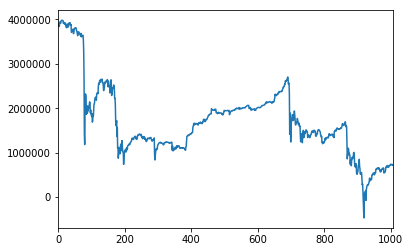

In [9]:
data['pvt'].plot()

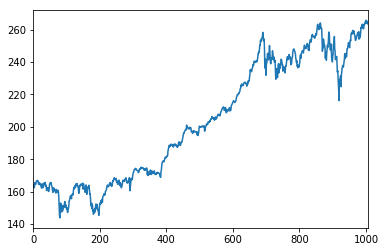

In [10]:
data['close'].plot()

[Python TA-Lib](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[pandas-statistics](https://pythonprogramming.net/pandas-statistics-correlation-tables-how-to/)  
[量價關係分析](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[股市技術分析利器之TA-Lib（一）](https://kknews.cc/zh-tw/other/pyyvkjz.html)  
[stock_market_indicators](https://github.com/voice32/stock_market_indicators/blob/master/indicators.py)  

In [85]:
df = pd.read_csv('data0.csv')
#df[['Close','Volume']].plot(secondary_y = ['Volume'])